In [26]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0
Keras 		2.0.3


In [27]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [29]:
mnist.train.images.shape

(55000, 784)

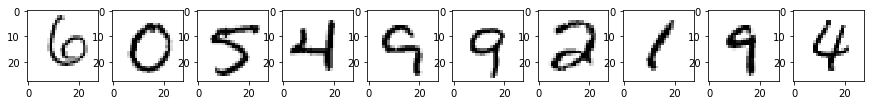

In [30]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [32]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))   
model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))   
model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=250, epochs=10, verbose=1,
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 4s - loss: 0.0169 - acc: 0.9944 - val_loss: 0.0714 - val_acc: 0.9842
Epoch 2/10
55000/55000 [==============================] - 4s - loss: 0.0132 - acc: 0.9953 - val_loss: 0.0772 - val_acc: 0.9846
Epoch 3/10
55000/55000 [==============================] - 4s - loss: 0.0127 - acc: 0.9955 - val_loss: 0.0760 - val_acc: 0.9819
Epoch 4/10
55000/55000 [==============================] - 4s - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0765 - val_acc: 0.9840
Epoch 5/10
55000/55000 [==============================] - 4s - loss: 0.0128 - acc: 0.9955 - val_loss: 0.0816 - val_acc: 0.9835
Epoch 6/10
55000/55000 [==============================] - 4s - loss: 0.0112 - acc: 0.9961 - val_loss: 0.0744 - val_acc: 0.9831
Epoch 7/10
55000/55000 [==============================] - 4s - loss: 0.0141 - acc: 0.9951 - val_loss: 0.0751 - val_acc: 0.9840
Epoch 8/10
55000/55000 [==============================] - 4s 

In [10]:
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.075428174587
Test accuracy: 0.979


In [11]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict_on_batch(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 1.4594842e-06,
 1: 4.7986667e-08,
 2: 5.683231e-08,
 3: 1.2110219e-09,
 4: 1.3419144e-07,
 5: 3.0428748e-07,
 6: 0.99999809,
 7: 1.1104975e-09,
 8: 3.3768956e-08,
 9: 6.2479605e-10}

In [12]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

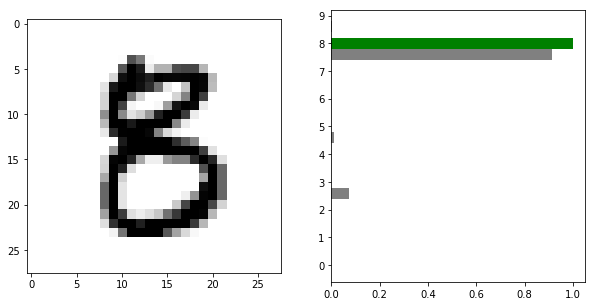

In [19]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)

In [20]:
### What went wrong?
pixels = mnist.test.images
result = model.predict_on_batch([pixels])
truth = mnist.test.labels

In [21]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 210


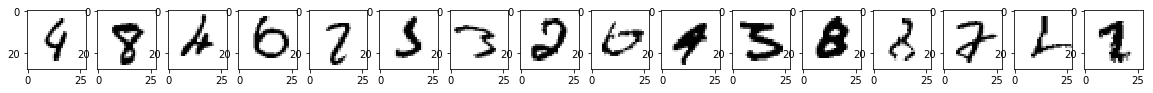

In [24]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()


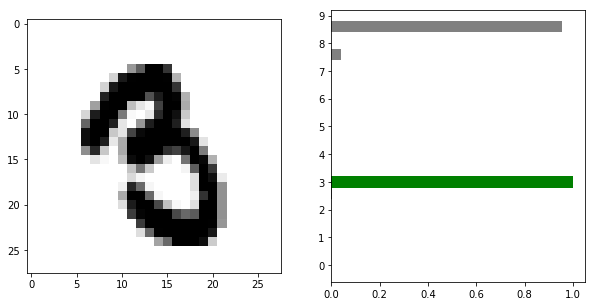

In [25]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)